# Install & Import Dependencies

In [1]:
import pandas as pd

In [107]:
# Increase width of display
pd.set_option('display.max_columns', 30)

# Increase cell width
pd.set_option('display.max_colwidth', 500)

# Prepare Data

## Load Data

### Breast Cancer Wisconsin (Diagnostic) dataset

In [2]:
wisconsin_df = pd.read_csv('data/breast-cancer-wisconsin-diagnostic/normalized.csv')

In [4]:
wisconsin_df.head()

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_smoothness,...,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_texture,worst_smoothness,worst_compactness,worst_symmetry,worst_fractal_dimension,diagnosis
0,1.096100,-2.071512,1.567087,3.280628,2.650542,2.215566,2.253764,2.487545,-0.564768,-0.213814,...,0.723390,0.660239,1.147747,0.906286,-1.358098,1.306537,2.614365,2.748204,1.935312,1
1,1.828212,-0.353322,-0.826235,-0.486643,-0.023825,0.001391,-0.867889,0.498816,-0.875473,-0.604819,...,-0.440393,0.259933,-0.804742,-0.099356,-0.368879,-0.375282,-0.430066,-0.243675,0.280943,1
2,1.578499,0.455786,0.941382,1.052000,1.362280,0.938859,-0.397658,1.227596,-0.779398,-0.296744,...,0.212889,1.423575,0.236827,0.293301,-0.023953,0.526944,1.081980,1.151242,0.201214,1
3,-0.768233,0.253509,3.280667,3.399917,1.914213,2.864862,4.906602,0.326087,-0.110312,0.689095,...,0.818798,1.114027,4.728520,2.045711,0.133866,3.391291,3.889975,6.040726,4.930672,1
4,1.748758,-1.150804,0.280125,0.538866,1.369806,-0.009552,-0.561956,1.269426,-0.789549,1.481763,...,0.827742,1.143199,-0.360775,0.498889,-1.465481,0.220362,-0.313119,-0.867590,-0.396751,1


### Breast Cancer Coimbra

In [5]:
coimbra_df = pd.read_csv('data/breast-cancer-coimbra/normalized.csv')

In [6]:
coimbra_df.head()

,age,bmi,glucose,insulin,leptin,adiponectin,resistin,mcp_1,classification
0,-0.577289,-0.813147,-1.233869,-0.725591,-0.928307,-0.069918,-0.543161,-0.339777,0
1,1.594902,-1.372795,-0.257184,-0.685066,-0.926394,-0.694338,-0.860481,-0.190398,0
2,1.532839,-0.887912,-0.301578,-0.547697,-0.452257,1.790232,-0.439752,0.057963,0
3,0.663963,-1.237933,-0.923106,-0.674041,-0.872237,-0.440036,-0.158181,1.137781,0
4,1.781089,-1.289009,-0.257184,-0.641958,-1.038178,-0.783482,-0.334899,0.691715,0


## Split & Balance Data

In [7]:
SEED = 35

### Breast Cancer Wisconsin (Diagnostic) dataset

In [8]:
target = 'diagnosis'
target_df = wisconsin_df[target]
features_df = wisconsin_df.drop(target, axis=1)

In [9]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

wis_X_train, wis_X_test, wis_y_train, wis_y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=SEED)
wis_X_train.describe()

,mean_radius,mean_texture,mean_smoothness,mean_compactness,mean_concavity,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_texture,worst_smoothness,worst_compactness,worst_symmetry,worst_fractal_dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.024822,0.002095,0.010183,0.006908,0.016753,0.008390,-0.018105,-0.010572,-0.013933,-0.054157,0.002557,0.004051,-0.003369,-0.011557,-0.003400,0.003795,0.004892,0.026824,0.015397,0.014359
std,0.988316,0.991641,1.004082,1.006743,1.015864,1.005359,0.992312,1.004854,0.995640,0.897769,1.009072,1.042442,0.992149,0.977482,1.011249,0.994635,1.008331,1.036393,1.005220,1.045087
min,-1.683090,-2.227289,-2.406852,-1.608721,-1.113893,-2.741705,-1.818265,-1.058992,-1.552898,-1.774504,-1.296957,-1.056571,-1.911765,-1.331092,-1.096004,-2.222039,-2.680337,-1.442609,-2.157444,-1.591019
25%,-0.658984,-0.703237,-0.721714,-0.750406,-0.742969,-0.671616,-0.714922,-0.626268,-0.678427,-0.653111,-0.711024,-0.569094,-0.675032,-0.668649,-0.583092,-0.730888,-0.690623,-0.689065,-0.657463,-0.691027
50%,-0.183678,-0.113844,-0.029883,-0.230266,-0.319235,-0.053325,-0.192286,-0.307855,-0.220890,-0.247452,-0.271280,-0.198890,-0.117683,-0.224076,-0.251280,-0.067882,-0.046802,-0.238756,-0.132147,-0.215146
75%,0.512963,0.584825,0.621419,0.507624,0.541907,0.533960,0.427370,0.272357,0.452547,0.332561,0.367813,0.322045,0.465759,0.317274,0.270437,0.701692,0.597020,0.596079,0.467522,0.449812
max,3.967796,4.647799,4.766717,4.564409,4.239858,4.480808,4.906602,8.899079,6.649429,5.425120,6.138081,12.062067,6.643755,7.065700,9.842932,3.495261,3.951897,5.108382,6.040726,6.840837


In [10]:
target_df.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [11]:
wis_y_train.value_counts()

diagnosis
0    284
1    171
Name: count, dtype: int64

In [13]:
# SMOTE oversampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=SEED)
wis_smote_X_train, wis_smote_y_train = smote.fit_resample(wis_X_train, wis_y_train)

print("Original shape: ", wis_X_train.shape)
print("SMOTE shape: ", wis_smote_X_train.shape)
print("Balance after SMOTE:")
wis_smote_y_train.value_counts()

Original shape:  (455, 20)
SMOTE shape:  (568, 20)
Balance after SMOTE:


diagnosis
0    284
1    284
Name: count, dtype: int64

In [14]:
# Random Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=SEED)
wis_ros_X_train, wis_ros_y_train = ros.fit_resample(wis_X_train, wis_y_train)

print("Original shape: ", wis_X_train.shape)
print("Random Oversampling shape: ", wis_ros_X_train.shape)
print("Balance after Random Oversampling:")
wis_ros_y_train.value_counts()

Original shape:  (455, 20)
Random Oversampling shape:  (568, 20)
Balance after Random Oversampling:


diagnosis
0    284
1    284
Name: count, dtype: int64

### Breast Cancer Coimbra

In [15]:
target = 'classification'
target_df = coimbra_df[target]
features_df = coimbra_df.drop(target, axis=1)

In [16]:
# Split data into training and testing sets
coi_X_train, coi_X_test, coi_y_train, coi_y_test = train_test_split(features_df, target_df, test_size=0.2, random_state=SEED)
coi_X_train.describe()

,age,bmi,glucose,insulin,leptin,adiponectin,resistin,mcp_1
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,0.073694,-0.036199,0.084946,-0.027944,-0.015822,-0.071750,-0.077253,-0.094655
std,1.009887,0.996161,1.086779,0.939758,1.023721,0.914410,0.897386,0.912626
min,-2.004729,-1.835032,-1.677817,-0.752906,-1.162682,-1.245715,-0.929408,-1.413085
25%,-0.763477,-0.940910,-0.523552,-0.579407,-0.775399,-0.707405,-0.647391,-0.767460
50%,0.136431,-0.066156,-0.212789,-0.419913,-0.393109,-0.291842,-0.343017,-0.300343
75%,0.865666,0.724852,0.242258,0.194771,0.500906,0.166739,0.154423,0.350744
max,1.967277,2.190508,4.581849,4.152054,3.318769,4.070983,3.267734,3.364413


In [17]:
target_df.value_counts()

classification
1    64
0    52
Name: count, dtype: int64

In [18]:
coi_y_train.value_counts()

classification
1    51
0    41
Name: count, dtype: int64

In [19]:
# SMOTE oversampling
coi_smote_X_train, coi_smote_y_train = smote.fit_resample(coi_X_train, coi_y_train)

print("Original shape: ", coi_X_train.shape)
print("SMOTE shape: ", coi_smote_X_train.shape)
print("Balance after SMOTE:")
coi_smote_y_train.value_counts()

Original shape:  (92, 8)
SMOTE shape:  (102, 8)
Balance after SMOTE:


classification
1    51
0    51
Name: count, dtype: int64

In [20]:
# Random Oversampling
coi_ros_X_train, coi_ros_y_train = ros.fit_resample(coi_X_train, coi_y_train)

print("Original shape: ", coi_X_train.shape)
print("Random Oversampling shape: ", coi_ros_X_train.shape)
print("Balance after Random Oversampling:")
coi_ros_y_train.value_counts()

Original shape:  (92, 8)
Random Oversampling shape:  (102, 8)
Balance after Random Oversampling:


classification
1    51
0    51
Name: count, dtype: int64

# Evaluate Models

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score


def validate_model(model, x, y, params, n_folds):
    """
    Use GridSearchCV for a special model to find the best hyperparameters based on validation set
    """
    grid_search = GridSearchCV(estimator=model,
                               param_grid=params,
                               scoring={
                                      'f1': make_scorer(f1_score),
                                      'accuracy': make_scorer(accuracy_score),
                                      'precision': make_scorer(precision_score, zero_division=0),
                                      'recall': make_scorer(recall_score),
                                      'roc_auc': make_scorer(roc_auc_score)
                               },
                               refit="f1",
                               n_jobs=-1,
                               cv=n_folds)
    grid_search.fit(x, y)
    best_index = grid_search.best_index_

    return grid_search.best_estimator_,\
           grid_search.cv_results_,\
           grid_search.best_params_

In [75]:
def test_evaluation(cur_best_model, cur_x_train, cur_y_train, cur_x_test, cur_y_test):
    """
    Evaluate model on test set.
    """
    cur_best_model.fit(cur_x_train, cur_y_train) # refit model on the whole train set
    cur_model_pred = cur_best_model.predict(cur_x_test)
    test_f1_score = f1_score(cur_y_test, cur_model_pred, average='macro')
    test_accuracy = accuracy_score(cur_y_test, cur_model_pred)
    test_precision = precision_score(cur_y_test, cur_model_pred, average='macro', zero_division=0)
    test_recall = recall_score(cur_y_test, cur_model_pred, average='macro')
    test_roc_auc = roc_auc_score(cur_y_test, cur_model_pred)

    return test_f1_score, test_accuracy, test_precision, test_recall, test_roc_auc

In [146]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


def evaluate_model(x_train, y_train, x_test, y_test, dataset_title):
    results_df = pd.DataFrame(
        columns=[
            "Dataset",
            "Model",
            "F1",
            "Accuracy",
            "Precision",
            "Recall",
            "ROC AUC",
            "Parameters",
        ]
    )

    n_folds = 5
    configs = [
        {
            "model_name": "SVC",
            "model": SVC(random_state=SEED),
            "params": {
                "C": [0.01, 0.1, 1, 10, 100, 1000],
                "gamma": [0.01, 0.1, 1, 10, 100, 1000],
                "kernel": ["rbf"],
            },
        },
        {
            "model_name": "Random Forest",
            "model": RandomForestClassifier(random_state=SEED),
            "params": {
                "n_estimators": [3, 5, 15, 25, 35, 45, 55, 100],
                "max_depth": [3, 4, 5, 7, 10],
                "min_samples_split": [2, 5, 7, 10],
                "min_samples_leaf": [1, 2, 4],
                "bootstrap": [True, False],
                "criterion": ["gini"],
            },
        },
        {
            "model_name": "XGBoost",
            "model": XGBClassifier(random_state=SEED),
            "params": {
                "learning_rate": [0.1, 0.01, 0.001],
                "n_estimators": [5, 10, 30, 50, 80, 100],
                "max_depth": [3, 4, 5, 6, 10],
                "min_child_weight": [1, 3, 6],
                "gamma": [0.1, 0.3, 0.6, 0.9],
                "objective": ["binary:logistic"],
            },
        },
    ]

    results_list = []
    for config in configs:
        model_name = config["model_name"]
        model = config["model"]
        params = config["params"]

        best_model, best_cv_results, best_params = validate_model(
            model=model, 
            x=x_train, 
            y=y_train, 
            params=params, 
            n_folds=n_folds,
        )
        test_f1, test_accuracy, test_precision, test_recall, test_roc_auc = (
            test_evaluation(
                cur_best_model=best_model,
                cur_x_train=x_train,
                cur_y_train=y_train,
                cur_x_test=x_test,
                cur_y_test=y_test,
            )
        )

        results_list.append({
            "Dataset": dataset_title,
            "Model": model_name,
            "F1": test_f1,
            "Accuracy": test_accuracy,
            "Precision": test_precision,
            "Recall": test_recall,
            "ROC AUC": test_roc_auc,
            "Parameters": best_params,
        })

    results_df = pd.DataFrame(results_list)

    best_result = results_df[results_df["F1"] == results_df["F1"].max()]
    
    return results_df, best_result

In [147]:
best_overall_df = None

### Wisconsin Breast Cancer (Diagnostic) Dataset

In [148]:
wisconsin_results_df, wisconsin_best_result_df = evaluate_model(
    x_train=wis_X_train,
    y_train=wis_y_train,
    x_test=wis_X_test,
    y_test=wis_y_test,
    dataset_title="Wisconsin: Original",
)
best_overall_df = wisconsin_best_result_df if best_overall_df is None else pd.concat([best_overall_df, wisconsin_best_result_df])

wisconsin_results_df

,Dataset,Model,F1,Accuracy,Precision,Recall,ROC AUC,Parameters
0,Wisconsin: Original,SVC,0.980743,0.982456,0.986667,0.975610,0.975610,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Wisconsin: Original,Random Forest,0.951576,0.956140,0.960526,0.944370,0.944370,"{'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}"
2,Wisconsin: Original,XGBoost,0.932206,0.938596,0.940789,0.925326,0.925326,"{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 80, 'objective': 'binary:logistic'}"


In [149]:
wisconsin_smote_results_df, wisconsin_smote_best_result_df = evaluate_model(
    x_train=wis_smote_X_train,
    y_train=wis_smote_y_train,
    x_test=wis_X_test,
    y_test=wis_y_test,
    dataset_title="Wisconsin: SMOTE",
)
best_overall_df = pd.concat([best_overall_df, wisconsin_smote_best_result_df])

wisconsin_smote_results_df

,Dataset,Model,F1,Accuracy,Precision,Recall,ROC AUC,Parameters
0,Wisconsin: SMOTE,SVC,0.961486,0.964912,0.967179,0.956565,0.956565,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Wisconsin: SMOTE,Random Forest,0.961486,0.964912,0.967179,0.956565,0.956565,"{'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}"
2,Wisconsin: SMOTE,XGBoost,0.932206,0.938596,0.940789,0.925326,0.925326,"{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'objective': 'binary:logistic'}"


In [150]:
wisconsin_ros_results_df, wisconsin_ros_best_result_df = evaluate_model(
    x_train=wis_ros_X_train,
    y_train=wis_ros_y_train,
    x_test=wis_X_test,
    y_test=wis_y_test,
    dataset_title="Wisconsin: Random Oversampling",
)
best_overall_df = pd.concat([best_overall_df, wisconsin_ros_best_result_df])

wisconsin_ros_results_df

,Dataset,Model,F1,Accuracy,Precision,Recall,ROC AUC,Parameters
0,Wisconsin: Random Oversampling,SVC,0.941538,0.947368,0.954019,0.932175,0.932175,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Wisconsin: Random Oversampling,Random Forest,0.951576,0.956140,0.960526,0.944370,0.944370,"{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 45}"
2,Wisconsin: Random Oversampling,XGBoost,0.941538,0.947368,0.954019,0.932175,0.932175,"{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'objective': 'binary:logistic'}"


### Coimbra Breast Cancer Dataset

In [151]:
coimbra_results_df, coimbra_best_result_df = evaluate_model(
    x_train=coi_X_train,
    y_train=coi_y_train,
    x_test=coi_X_test,
    y_test=coi_y_test,
    dataset_title="Coimbra: Original",
)
best_overall_df = pd.concat([best_overall_df, coimbra_best_result_df])

coimbra_results_df

,Dataset,Model,F1,Accuracy,Precision,Recall,ROC AUC,Parameters
0,Coimbra: Original,SVC,0.624348,0.625000,0.625000,0.625874,0.625874,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Coimbra: Original,Random Forest,0.619048,0.625000,0.621429,0.618881,0.618881,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 35}"
2,Coimbra: Original,XGBoost,0.707826,0.708333,0.721429,0.716783,0.716783,"{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 80, 'objective': 'binary:logistic'}"


In [152]:
coimbra_smote_results_df, coimbra_smote_best_result_df = evaluate_model(
    x_train=coi_smote_X_train,
    y_train=coi_smote_y_train,
    x_test=coi_X_test,
    y_test=coi_y_test,
    dataset_title="Coimbra: SMOTE",
)
best_overall_df = pd.concat([best_overall_df, coimbra_smote_best_result_df])

coimbra_smote_results_df

,Dataset,Model,F1,Accuracy,Precision,Recall,ROC AUC,Parameters
0,Coimbra: SMOTE,SVC,0.62500,0.666667,0.715789,0.643357,0.643357,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
1,Coimbra: SMOTE,Random Forest,0.58042,0.583333,0.580420,0.580420,0.580420,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 45}"
2,Coimbra: SMOTE,XGBoost,0.75000,0.750000,0.755245,0.755245,0.755245,"{'gamma': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 80, 'objective': 'binary:logistic'}"


In [153]:
coimbra_ros_results_df, coimbra_ros_best_result_df = evaluate_model(
    x_train=coi_ros_X_train,
    y_train=coi_ros_y_train,
    x_test=coi_X_test,
    y_test=coi_y_test,
    dataset_title="Coimbra: Random Oversampling",
)
best_overall_df = pd.concat([best_overall_df, coimbra_ros_best_result_df])

coimbra_ros_results_df

,Dataset,Model,F1,Accuracy,Precision,Recall,ROC AUC,Parameters
0,Coimbra: Random Oversampling,SVC,0.624348,0.625000,0.625000,0.625874,0.625874,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Coimbra: Random Oversampling,Random Forest,0.707826,0.708333,0.708333,0.709790,0.709790,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}"
2,Coimbra: Random Oversampling,XGBoost,0.619048,0.625000,0.621429,0.618881,0.618881,"{'gamma': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 30, 'objective': 'binary:logistic'}"


### Best Results

In [154]:
best_overall_df.sort_values(["Dataset", "F1"])

,Dataset,Model,F1,Accuracy,Precision,Recall,ROC AUC,Parameters
2,Coimbra: Original,XGBoost,0.707826,0.708333,0.721429,0.716783,0.716783,"{'gamma': 0.3, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 80, 'objective': 'binary:logistic'}"
1,Coimbra: Random Oversampling,Random Forest,0.707826,0.708333,0.708333,0.709790,0.709790,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 5}"
2,Coimbra: SMOTE,XGBoost,0.750000,0.750000,0.755245,0.755245,0.755245,"{'gamma': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 80, 'objective': 'binary:logistic'}"
0,Wisconsin: Original,SVC,0.980743,0.982456,0.986667,0.975610,0.975610,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Wisconsin: Random Oversampling,Random Forest,0.951576,0.956140,0.960526,0.944370,0.944370,"{'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 45}"
0,Wisconsin: SMOTE,SVC,0.961486,0.964912,0.967179,0.956565,0.956565,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
1,Wisconsin: SMOTE,Random Forest,0.961486,0.964912,0.967179,0.956565,0.956565,"{'bootstrap': False, 'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}"


In [174]:
# Save all results to a CSV file
best_overall_df.to_csv("data/results/best-overall-results.csv", index=False)

result_dfs = [ 
    wisconsin_results_df,
    wisconsin_smote_results_df,
    wisconsin_ros_results_df,
    coimbra_results_df,
    coimbra_smote_results_df,
    coimbra_ros_results_df
]
results_df = pd.concat(result_dfs)
results_df.to_csv("data/results/all-results.csv", index=False)

### ROC AUC

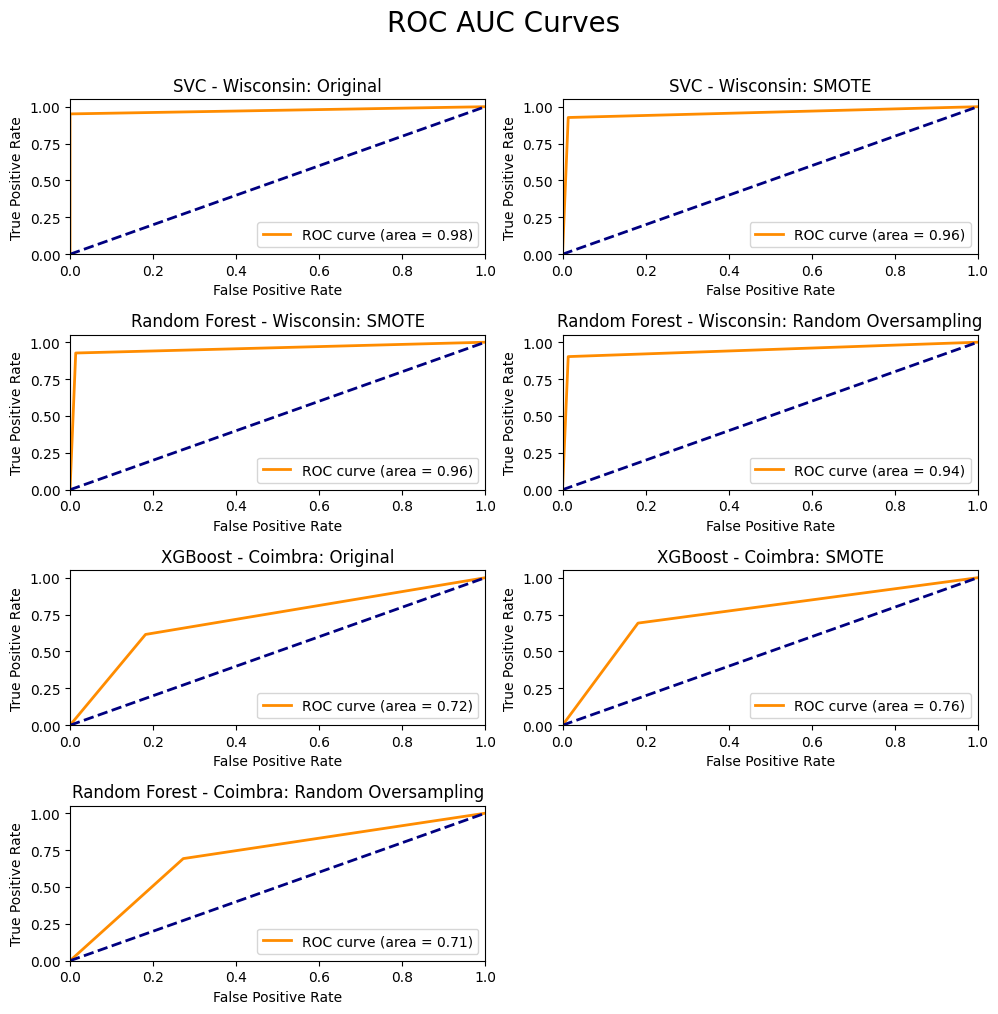

In [173]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models_mapping = {
    "SVC": SVC(random_state=SEED),
    "Random Forest": RandomForestClassifier(random_state=SEED),
    "XGBoost": XGBClassifier(random_state=SEED),
}

dataset_mapping = {
    "Wisconsin: Original": (wis_X_train, wis_y_train, wis_X_test, wis_y_test),
    "Wisconsin: SMOTE": (wis_smote_X_train, wis_smote_y_train, wis_X_test, wis_y_test),
    "Wisconsin: Random Oversampling": (wis_ros_X_train, wis_ros_y_train, wis_X_test, wis_y_test),
    "Coimbra: Original": (coi_X_train, coi_y_train, coi_X_test, coi_y_test),
    "Coimbra: SMOTE": (coi_smote_X_train, coi_smote_y_train, coi_X_test, coi_y_test),
    "Coimbra: Random Oversampling": (coi_ros_X_train, coi_ros_y_train, coi_X_test, coi_y_test),
}

def plot_roc_auc_curve(x_train, y_train, x_test, y_test, model_name, params, dataset_title, ax):
    model = models_mapping[model_name]
    model.set_params(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    lw = 2
    ax.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f"{model_name} - {dataset_title}")
    ax.legend(loc="lower right")

fig, axs = plt.subplots(nrows=(len(best_overall_df)+1)//2, ncols=2, figsize=(10, 10))
axs = axs.flatten()

for index, ((_, row), ax) in enumerate(zip(best_overall_df.iterrows(), axs)):
    dataset_title = row["Dataset"]
    model_name = row["Model"]
    params = row["Parameters"]
    x_train, y_train, x_test, y_test = dataset_mapping[dataset_title]
    plot_roc_auc_curve(x_train, y_train, x_test, y_test, model_name, params, dataset_title, ax)

# If the number of plots is odd remove the last extra plot
if len(best_overall_df) % 2 != 0:
    fig.delaxes(axs[-1])

plt.suptitle("ROC AUC Curves", y=1.01, fontsize=20)
plt.tight_layout()
plt.show()

### Confusion Matrices

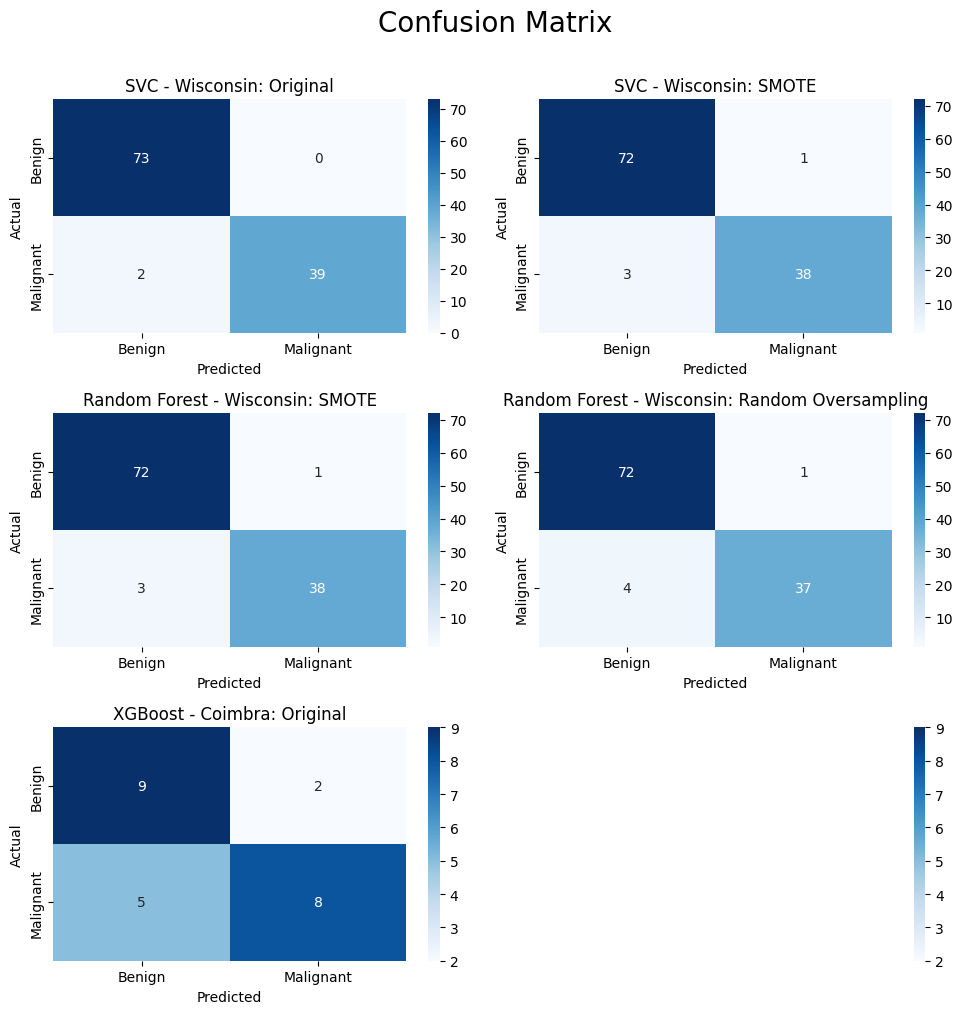

In [167]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(x_train, y_train, x_test, y_test, model_name, params, dataset_title, ax):
    model = models_mapping[model_name]
    model.set_params(**params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"], ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"{model_name} - {dataset_title}")

fig, axs = plt.subplots(nrows=len(best_overall_df)//2, ncols=2, figsize=(10, 10))
axs = axs.flatten()    

for index, ((_, row), ax) in enumerate(zip(best_overall_df.iterrows(), axs)):
    dataset_title = row["Dataset"]
    model_name = row["Model"]
    params = row["Parameters"]
    x_train, y_train, x_test, y_test = dataset_mapping[dataset_title]
    plot_confusion_matrix(x_train, y_train, x_test, y_test, model_name, params, dataset_title, ax)

# If the number of plots is odd remove the last extra plot
if len(best_overall_df) % 2 != 0:
    fig.delaxes(axs[-1]) 

plt.suptitle("Confusion Matrix", y=1.01, fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
"""
Accuracy: Accuracy is the most intuitive metric. It’s simply the ratio of correct predictions (both positive and negative) to all predictions. However, it can be misleading if the classes are highly imbalanced.

Precision: Precision answers the question of all patients we diagnosed as having cancer, how many actually had cancer? It is a measure of how trustworthy is the positive prediction by our model.

Recall (Sensitivity or True Positive Rate): Recall answers the question: Of all the patients that truly have cancer, how many are correctly identified? It indicates how many of the actual positives our model capture through labeling it as Positive (True Positive).

F1 Score: F1 Score is the Harmonic Mean between precision and recall, and it tries to find the balance between precision and recall. It is particularly useful in cases where you have uneven class distribution.

Area Under ROC (Receiver Operating Characteristic) Curve or simply AUC: This is one of the most commonly used metrics used in the classification problems. This tells us about the capability of the model in separating the classes is higher with the higher value of AUC.
"""